## Scikit-Learn (sklearn)

###  An end-to-end Scikit-Learn workflow

In [84]:
# 1.Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# Create X (feature matrix) --> X = all your input features for all your samples.
X = heart_disease.drop("target",axis=1) #removing the “target” column from the DataFrame.
#axis=1 means you’re dropping a column (not a row).

#Create Y (label vector) --> Y =  what you want to predict
Y = heart_disease["target"] #we want to predict the target either 0 or 1

In [9]:
#2. Choose the right model and hyperparameter. Hyperparameters are settings you choose before training a model.They control how the algorithm learns.They are not learned from data, but control how the model learns.
from sklearn.ensemble import RandomForestClassifier
# RandomForestClassifier --> machine learning model in scikit-learn.It builds a “forest” of decision trees to classify data.initialize it with settings called hyperparameters.
clf = RandomForestClassifier(n_estimators=100) #This creates a RandomForest with 100 trees.
#We'll keep the default hyperparamter
clf.get_params() #.get_params() is a method on any scikit-learn model.It returns a dictionary of all hyperparameters and their current values.

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
#3. Fit the model to the training data.Splitting data into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.2) #train_test_split() splits your data into training and testing sets 
#X_train, Y_train Used to train the model  X_test, Y_test Used to test (evaluate) the model
#test_size = 0.2 --> Use 20% of the data for testing, 80% for training.

In [7]:
clf.fit(X_train,Y_train); #fit your model only on training data:

In [8]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,45,1,0,142,309,0,0,147,1,0.0,1,3,3
155,58,0,0,130,197,0,1,131,0,0.6,1,0,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2


In [9]:
# Make a prediction
Y_pred = clf.predict(X_test)
Y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [10]:
#4. Evaluate the model on the training data and test data
clf.score(X_train,Y_train)

1.0

In [11]:
clf.score(X_test,Y_test)

0.8360655737704918

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [13]:
accuracy_score(Y_test,Y_pred)

0.8360655737704918

In [16]:
# 5. Imporve a model
# Try different n_estimator
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimator ..')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
    print(f'Model accuracy on test set : {clf.score(X_test,Y_test)*100:.2f}%')
    print(" ")

Trying model with 10 estimator ..
Model accuracy on test set : 80.33%
 
Trying model with 20 estimator ..
Model accuracy on test set : 78.69%
 
Trying model with 30 estimator ..
Model accuracy on test set : 80.33%
 
Trying model with 40 estimator ..
Model accuracy on test set : 80.33%
 
Trying model with 50 estimator ..
Model accuracy on test set : 83.61%
 
Trying model with 60 estimator ..
Model accuracy on test set : 81.97%
 
Trying model with 70 estimator ..
Model accuracy on test set : 81.97%
 
Trying model with 80 estimator ..
Model accuracy on test set : 81.97%
 
Trying model with 90 estimator ..
Model accuracy on test set : 85.25%
 


In [17]:
# 6.Save a model and load it 
import pickle
pickle.dump(clf,open("random_forst_model_1.pkl","wb"))

In [24]:
loaded_model = pickle.load(open("random_forst_model_1.pkl","rb"))
score_latest=loaded_model.score(X_test,Y_test)
score_latest

0.8524590163934426

## 1. Getting the Data Ready

### Three main things to do:
    1.Split the data into Features matrix(X) and Label vector(y)
    2.Filling (also called imputing) or disregarding missing values
    3.Converting non numeric values to numerci values (also called feature coding)

In [27]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1.1 Split the data into Features matrix(X) and Label vector(y)

In [30]:
#Split the data into Features matrix(X) 
X = heart_disease.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [31]:
#Split the data into Label vector(y)
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [32]:
#Spliting the data into training and test data 
#mostly the data is split as 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.2 Converting non numeric values to numeric values

In [41]:
# for this one we are getting another dataset since heart_disease dataset has all numeric values

In [42]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [43]:
len(car_sales)

1000

In [44]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

we have to convert make and color to numeric value

In [56]:
#Split the data into X and y
X = car_sales.drop("Price",axis=1)
y = car_sales["Price"]

#SPLIT THE DATA INTO TRAINING AND TESTING

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [58]:
 # Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

cateogorical_feature = ["Make","Colour","Doors"] #list the columns you want to transform
one_hot = OneHotEncoder() # it will turn each category into a separate binary column.
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 cateogorical_feature)],
                                remainder="passthrough")
transformed_x = transformer.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]], shape=(1000, 13))

In [59]:
# fit the model
X_train,X_test,y_train,y_test = train_test_split(transformed_x,y,test_size=0.2)

In [60]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.2330485230539474

## 1.3 Handle Missing Values
    Two ways to handle
     1. Fill them with some value(also known as imputation).
     2. Remove the samples with missing data altogether
    Note - In a newer version of Scikit-Learn (0.23+), the OneHotEncoder class was upgraded to be able to handle None & NaN values so no error will appear.

In [70]:
car_sales_missing = pd.read_csv("car-sales-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [72]:
#split the data
X = car_sales_missing.drop("Price",axis=1)
y = car_sales_missing["Price"]
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)
#convert to numeric
cateogorical_feature = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,cateogorical_feature)], remainder="passthrough")
transformed_x1 = transformer.fit_transform(X)
transformed_x1.toarray()

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.50043e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        8.78990e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
                nan],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.11790e+04],
       [0.00000e+00, 0.00000e+00, 1.

### Option 1. Fill missing data with Pandas

In [71]:
car_sales_missing.isna().sum()

Make        1
Colour      1
Odometer    4
Doors       1
Price       2
dtype: int64

In [74]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace=True)
# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)
# Fill the "Odometer" column
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(),inplace=True)
# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4.0,inplace=True)

C:\Users\haris\AppData\Local\Temp\ipykernel_3120\2113880315.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing",inplace=True)
C:\Users\haris\AppData\Local\Temp\ipykernel_3120\2113880315.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

In [75]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       2
dtype: int64

In [90]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [77]:
car_sales_missing.isna().sum()

Make        0
Colour      0
Odometer    0
Doors       0
Price       0
dtype: int64

### Option 2. Fill missing data with Scikitlearn

In [123]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [124]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [125]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [126]:
# Split into X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

# Split data into train and test
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [129]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill the categorical values with 'missing' & numeric value with mean
categorical_imputer = SimpleImputer(strategy='constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
odometer_imputer = SimpleImputer(strategy='mean')

#Define columns
cateogorical_feature = ["Make","Colour"]
door_feature = ["Doors"]
odometer_feature = ["Odometer (KM)"]

#Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('categorical_imputer',categorical_imputer,cateogorical_feature),
    ('door_imputer',door_imputer,door_feature),
    ('odometer_imputer',odometer_imputer,odometer_feature)
])

#Transform the data
# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train)
filled_X_test = imputer.transform(X_test)
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], shape=(760, 4), dtype=object)

In [130]:
# Get our transformed data array's back into DataFrame's
car_sales_filled_train = pd.DataFrame(filled_X_train, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled_test = pd.DataFrame(filled_X_test, 
                                     columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [98]:
car_sales_filled.isna().sum()

Make        0
Colour      0
Doors       0
Odometer    0
dtype: int64

In [131]:
#convert to numeric
cateogorical_feature = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,cateogorical_feature)], remainder="passthrough")
# Fill train and test values separately
transformed_X_train = transformer.fit_transform(car_sales_filled_train)
transformed_X_test = transformer.transform(car_sales_filled_test)
# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]], shape=(760, 15))

In [133]:
# now we go the data as numbers and filled the missing values
# lets fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit(transformed_X_train,y_train)
model.score(transformed_X_test,y_test)

0.21229043336119102

## 2.Choosing the right estimator/algorithm for a problem

Some things to notes:
*sklearn refers to machone learning models,algortithms as estimators.
* Classification problem = predicting category (heart disease or not)
    * `clf` (short form form classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)
* MachineLearningMap : https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine Learning model for a regression problem
 using California Housing Dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [58]:
# Get california housing data
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [61]:
# Create a DataFrame with housing_data
housing_data_df = pd.DataFrame(housing_data['data'],columns=housing_data["feature_names"])
housing_data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [65]:
# the target field gives the Medhouse value create a column in housing_data_df for target
housing_data_df["target"] = housing_data["target"]
housing_data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [149]:
# Import algorithm
from sklearn.linear_model import Ridge
# Setup random seed
np.random.seed(42)
# Create the data
X = housing_data_df.drop("target",axis=1)
y = housing_data_df["target"] # median house price in $100,00s
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model on trainning set
model = Ridge(alpha=0.5)
model.fit(X_train,y_train)

#Check the score of the model
model.score(X_test,y_test)

0.5758213996714423

In [148]:
# trying another model Lasso
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(X_train,y_train)

#Check the score of the model
model.score(X_test,y_test)

0.2841671821008396

In [66]:
# trying another model - Essemble model
# import the randomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
# Create the data
X = housing_data_df.drop("target",axis=1)
y = housing_data_df["target"] # median house price in $100,00s
# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.806652667101436

## 2.2 Picking a machine Learning model for a classification problem

* Using breast_cancer dataset from scikitlearn - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
* MachineMachineLearningMap : https://scikit-learn.org/stable/machine_learning_map.html

In [152]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [159]:
#Convert the imported dataset to DataFrame
data_df = pd.DataFrame(data['data'],columns=data['feature_names'])
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [160]:
# Add the target column to the Dataset
data_df['target'] = data['target']
data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [164]:
## No missing data
data_df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [167]:
# All data are numeric 
data_df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [170]:
# Import algorithm
from sklearn.svm import LinearSVC
np.random.seed(42)
# Create X and y dataset
X = data_df.drop("target",axis=1)
y = data_df["target"]
#Split the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model on trainning set
clf = LinearSVC()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.956140350877193

In [172]:
# try another algorithm - RandomForestClassifier
# Import algorithm
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Create X and y dataset
X = data_df.drop("target",axis=1)
y = data_df["target"]
#Split the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model on trainning set
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9649122807017544

### Tidbit:
         1. If you have structured data(in form of tables), use ensemble methods
         2. If you have unstructured data(like images,audio,text), use deep learning or transfer learning

## 3.Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model on the data
Different names for:
 * `X` = features, features variables, data
 * `y` = labels, targets, target variables

In [174]:
# Import algorithm
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
# Create X and y dataset
X = data_df.drop("target",axis=1)
y = data_df["target"]
#Split the dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model on trainning set
clf = RandomForestClassifier()

#Fit the model to the data
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.9649122807017544

### 3.2 Make predictions using a machine learning model
Once your model instance is trained, you can use the predict() method to predict a target value given a set of features.
In other words, use the model, along with some new, unseen and unlabelled data to predict the label.
Note: Data you predict on should be in the same shape and format as data you trained on.
2 ways to male predictions:
    1.`predict()` 
    2.`predict_proba()`

In [181]:
# import the csv file and model
heart_disease = pd.read_csv("heart-disease.csv")
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

# Create feature matrix and label vector
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

# Split the data set inro training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Select required model
model = RandomForestClassifier(n_estimators=100)

#fit the training data into the model
model.fit(X_train,y_train)

#score the model
model.score(X_test,y_test)


0.8524590163934426

In [185]:
y_preds = model.predict(np.array([0,2,3,5,6])) # This doesn't work... incorrect shapes

C:\Users\haris\Desktop\MachineLearning\Scikit-Learn\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 5. 6.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

We get a ValueError (mismatched shapes):

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
This happens because we're trying to make predictions on data that is in a different format to the data our model was trained on.

Since our model was trained on data from X_train, predictions should be made on data in the same format and shape as X_train.

Our goal in many machine learning problems is to use patterns learned from the training data to make predictions on the test data (or future unseen data).

In [186]:
y_preds = model.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [188]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [190]:
# Compare the prediction (y_preds) to true label (y_test) to evaluate the model
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [191]:
model.score(X_test,y_test)

0.8524590163934426

#### Make predictions with `predict_proba()`
predict_proba() - Returns probabilities for all classification label
Unlike predict(), which outputs the most likely class label, predict_proba() provides a more granular insight into the model's confidence for each possible outcome.

predict_proba() 

*   It returns the probabilities of each class.
    For binary classification (2 classes):
    Returns an array with two probabilities for each sample.
    Example output for one sample: [0.2, 0.8]
    20% chance of class 0
    80% chance of class 1
    For multiclass classification (>2 classes):
    Returns probabilities for each class.
    Example: [0.1, 0.3, 0.6] for 3 classes.
    All probabilities for each sample sum to 1.

In [192]:
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [193]:
model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression model

In [194]:
housing_data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Using `predict()` on regression models

In [195]:
housing_data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [206]:
# import the model
from sklearn.ensemble import RandomForestRegressor
# Split data
X = housing_data_df.drop("target",axis=1)
y = housing_data_df["target"]
# Training set and testing set
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)
#Integrate the model
model = RandomForestRegressor(n_estimators=100)
#fit the model
model.fit(X_train,y_train)
#score
model.score(X_test,y_test)


0.8130661643722479

In [211]:
# using predict
ypreds = model.predict(X_test)
ypreds[:10]

array([5.00001  , 2.5665101, 2.29219  , 2.3275606, 2.3952302, 2.23757  ,
       2.0843101, 0.71207  , 2.12808  , 2.56422  ])

In [208]:
np.array(y_test[:10])

array([5.00001, 2.436  , 2.385  , 1.665  , 1.817  , 2.263  , 2.417  ,
       0.658  , 2.134  , 1.879  ])

In [212]:
# average difference btw predictred value and true value
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,ypreds)

0.32001366283914745

## 4.Evaluating a machine learn model

### 4.1 Evaluating a model with `score()` Method

In [11]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [12]:
# highest value for the .score() is 1.0, lowest will be 0.0
model.score(X_train,y_train)

1.0

Let's use `score()` on our regression problem

In [13]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [223]:
# For regression: .score() returns the R² (coefficient of determination).
model.score(X_test,y_test)

0.5314492715517243

### 4.2 Evaluating a model using `scoring` parameter

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
np.random.seed(42)
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [227]:
model_single_score = model.score(X_test,y_test)

In [229]:
model_cross_val_score = np.mean(cross_val_score(model,X,y))

In [230]:
model_single_score,model_cross_val_score

(0.8524590163934426, np.float64(0.8182513661202184))

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

**Accuracy**

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier()

cross_val_score = cross_val_score(model,X,y)

In [17]:
np.mean(cross_val_score)

np.float64(0.8215300546448088)

In [18]:
print(f"Heart Disease Classifier Cross-Validated Accuracy:{np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy:82.15%


In [19]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8360655737704918

**Area under Receiver Operating Characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC
  
ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).
AUC is the area under that curve.

* True positive = model predicts 1 when truth is 1 
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1
  
Interpretation:

* AUC = 1 → perfect classifier.
* AUC = 0.5 → random guessing.
* AUC < 0.5 → worse than random.


In [21]:
from sklearn.metrics import roc_curve
X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
# Making predictions
y_predict = model.predict_proba(X_test)
y_predict[:10]

array([[0.38, 0.62],
       [0.03, 0.97],
       [0.92, 0.08],
       [0.4 , 0.6 ],
       [0.09, 0.91],
       [0.02, 0.98],
       [0.11, 0.89],
       [0.76, 0.24],
       [0.59, 0.41],
       [0.5 , 0.5 ]])

In [23]:
y_predict_positive = y_predict[:,1]
y_predict_positive[:10]

array([0.62, 0.97, 0.08, 0.6 , 0.91, 0.98, 0.89, 0.24, 0.41, 0.5 ])

In [24]:
# calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(y_test,y_predict_positive)
#Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03448276,
       0.06896552, 0.06896552, 0.13793103, 0.13793103, 0.20689655,
       0.20689655, 0.27586207, 0.27586207, 0.4137931 , 0.48275862,
       0.55172414, 0.55172414, 0.72413793, 0.79310345, 0.93103448,
       1.        ])

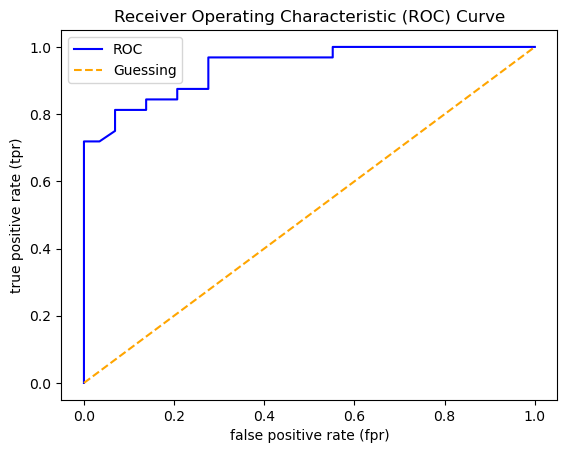

In [26]:
# create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    """
    Plots the ROC curve given the false positive rate (fpr)
    and true positive rate (tpr)
    """
    # Plot roc curve
    plt.plot(fpr,tpr,color="blue",label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color="orange",linestyle="--",label="Guessing")
    #Customization 
    plt.xlabel("false positive rate (fpr)")
    plt.ylabel("true positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_predict_positive)

np.float64(0.9401939655172413)

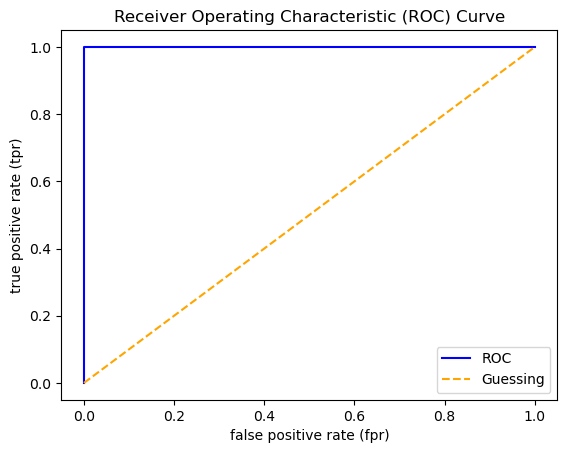

In [29]:
# Plot a perfect rock curve
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [31]:
# Perfect AUC score (Maximum score)
roc_auc_score(y_test,y_test)

np.float64(1.0)

**Confusion matrix**

A confusion matrix is a quickway to compare the labels a model predicts and the actual labels it wassupposed to predict.
In essence,giving you an idea of where the model is getting confused.

In [32]:
from sklearn.metrics import confusion_matrix
y_preds = model.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 5, 27]])

In [33]:
# Vizualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames=["Predicted Lables"])

Predicted Lables,0,1
Actual Labels,,
0,24,5
1,5,27


In [42]:
# How to install a conda package into the current env from jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.3.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda




<Axes: >

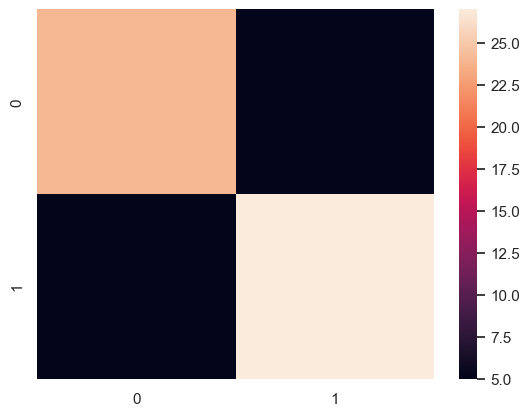

In [41]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

#set font scale
sns.set(font_scale=1)

#Create a confusion matrix
conf_matrix = confusion_matrix(y_test,y_preds)

#Plot with seaborn
sns.heatmap(conf_matrix)

In [46]:
import sklearn
sklearn.__version__

'1.6.1'

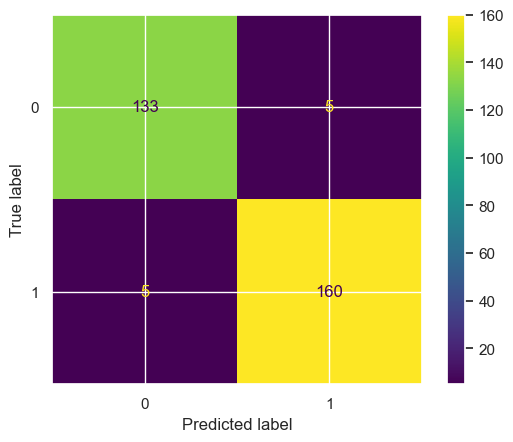

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model,X=X,y=y)

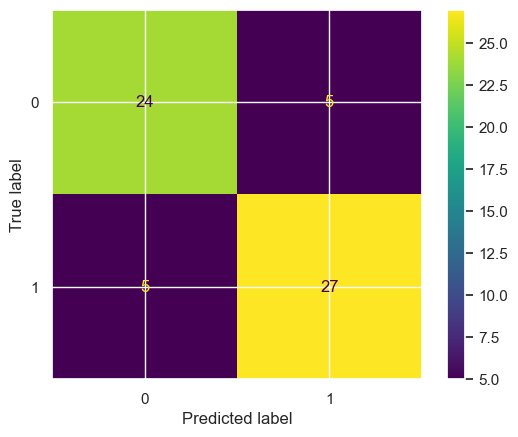

In [51]:

ConfusionMatrixDisplay.from_predictions(y_true = y_test,
    y_pred = y_preds)

Creating a confusion matrix using Scikit-Learn
Scikit-Learn has multiple different implementations of plotting confusion matrices:

sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.

sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

**Classification Report**

The final major metric you should consider when evaluating a classification model is a classification report.

A classification report is more so a collection of metrics rather than a single one.

You can create a classification report using Scikit-Learn's sklearn.metrics.classification_report` method.

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Support - The number of samples each metric was calculated on.

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.

Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.

Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

When should you use each?

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [54]:
# Where precision and recall become valuble
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))


C:\Users\haris\Desktop\MachineLearning\Scikit-Learn\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\haris\Desktop\MachineLearning\Scikit-Learn\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\haris\Desktop\MachineLearning\Scikit-Learn\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Evaluation metrics- Regression model

Similar to classification, there are several metrics you can use to evaluate your regression models.(https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

  1. R^2 (pronounced r-squared) or coefficient of determination
  2. Mean absolute error (MAE)
  3. Mean squared error (MSE)


**R^2 (pronounced r-squared) or coefficient of determination**

 Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1. Higher is better.

In [69]:
housing_data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [67]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_data_df.drop("target",axis = 1)
y = housing_data_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
model.score(X_test,y_test)

0.806652667101436

In [71]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean as same length of y_test
y_test_mean = np.full(len(y_test),y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031], shape=(4128,))

In [73]:
r2_score(y_true = y_test,
        y_pred = y_test_mean )
# r2_score = 0.0  = Model predicts no better than mean of data

0.0

In [74]:
r2_score(y_true = y_test,
        y_pred = y_test )

1.0

**Mean absolute error (MAE)**

Average of the absolute differences between predicted and actual values.It gives you an idea of how wrong your predictions were. Lower is better.

In [77]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_test_mean)

0.9027197890329232

In [78]:
mean_absolute_error(y_test,y_test)

0.0

In [79]:
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

0.32656738464147306

Our model achieves an MAE of 0.327.

This means, on average our models predictions are 0.327 (plus or minus) units away from the actual value.

Let's make it a little more visual.

In [81]:
df = pd.DataFrame(data = {"actual values" : y_test,
                          "predicted values":y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240


In [82]:
df["differences"].mean() #  this different from the mae because .mean() takes negative values also 

np.float64(0.0120639253875965)

In [87]:
np.abs(df["differences"]).mean()
#np.abs is NumPy’s absolute value function.It converts all negative values to positive.

np.float64(0.32656738464147306)

You can see the predictions are slightly different to the actual values.

Depending what problem you're working on, having a difference like we do now, might be okay. On the flip side, it may also not be okay, meaning the predictions would have to be closer.

**Mean squared error (MSE)**

MSE is the mean of the square of the erros between actual and predicted values.MSE will often be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

In [89]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_preds)
mse

0.25336408094921037

In [91]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,square differences,squared_differences
20046,0.47700,0.493900,0.016900,0.000286,0.000286
3024,0.45800,0.754940,0.296940,0.088173,0.088173
15663,5.00001,4.928596,-0.071414,0.005100,0.005100
20484,2.18600,2.540240,0.354240,0.125486,0.125486
9814,2.78000,2.331760,-0.448240,0.200919,0.200919


In [92]:
squared = np.square(df["differences"])
squared.mean()

np.float64(0.25336408094921037)

which regression evaluation metric should you use?

R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000  off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000  off is more than twice as bad as being $5,000 off.

### 4.2.3 Evaluating a model using the `scoring` parameter

We've covered a bunch of ways to evaluate a model's predictions but haven't even touched the scoring parameter.

The scoring parameter can be used with a function like cross_val_score() to tell Scikit-Learn what evaluation metric to return using cross-validation.

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [95]:

np.random.seed(42)

#Cross-validation accuracy -Instead of training and testing on a single split (e.g., 80% train, 20% test), cross-validation repeatedly splits the data into different train/test partitions.
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [98]:
#Cross-validation accuracy
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [100]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
np.mean(cv_acc)

np.float64(0.8248087431693989)

In [104]:
# precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring="precision")
print(f"The cross validated precision is: {np.mean(cv_precision)}")

The cross validated precision is: 0.8329547346025924


In [105]:
# recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
print(f"The cross validated recall is: {np.mean(cv_recall)}")

The cross validated recall is: 0.8545454545454545


In [106]:
# f1
np.random.seed(42)
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
print(f"The cross validated recall is: {np.mean(cv_f1)}")

The cross validated recall is: 0.8426854603423344


Using `scoring` parameters being used on Regression problems

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X = housing_data_df.drop("target",axis = 1)
y = housing_data_df["target"]

model =  RandomForestRegressor()


In [108]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=3,scoring=None) # defaut scoring is r2
np.mean(cv_r2)

np.float64(0.6545660727379677)

In [111]:
# MSE
np.random.seed(42)
cv_mse = cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error") 
np.mean(cv_mse)

np.float64(-0.4613849035890462)

In [110]:
# MAE
np.random.seed(42)
cv_mae = cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error") 
np.mean(cv_mae)

np.float64(-0.48352491831879857)

## 4.3 Using different evaluation metrics as Scikit-Learn function

The 3rd way to evaluate scikit-learn machine learning models/estimators is to using the `sklearn.metrics` module

In [124]:
# Classification Model
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

ypreds = clf.predict(X_test)
print("Classifier metrics on the test set")
print(f'Accuracy: {accuracy_score(y_test,ypreds)*100:.2f}%')
print(f'Precision: {precision_score(y_test,ypreds)}')
print(f'Recall: {recall_score(y_test,ypreds)}')
print(f'F1: {f1_score(y_test,ypreds)}')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [126]:
# Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_data_df.drop("target",axis=1)
y = housing_data_df["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(X_train,y_train)

ypreds = model.predict(X_test)

print("Regression metrics on the test set")
print(f'R2: {r2_score(y_test,ypreds):.2f}')
print(f'MAE: {mean_absolute_error(y_test,ypreds)}')
print(f'MSE: {mean_squared_error(y_test,ypreds)}')


Regression metrics on the test set
R2: 0.81
MAE: 0.32656738464147306
MSE: 0.25336408094921037


### 5. Improving A Machine Learning Model

The first predictions you make with a model are generally referred to as baseline predictions.

It's similar for the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

How?

Experiment, experiment, experiment!

Two of the main methods to improve baseline metrics are:

    1.From a data perspective.
    2.From a model perspective.
    
From a data perspective asks:
* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning data into numbers) strategy.
    
From a model perspective asks:

* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
* Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?
    
Note: Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a person (you) can adjust to (potentially) improve its ability to find patterns

In [128]:
 # how to find the hyperparamters in a model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Three ways to adjust Hyperparamters:**
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tunning Hyperparamter by Hand  (also called manual hyperparameter tuning) 

Manually try different hyperparameter values and see which one performs best on validation dataSet.



Going to try and adjust
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [130]:
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparison on y_true labels vs y_preds labels on a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy,2),
                   "precision" : round(precision,2),
                   "recall" : round(recall,2),
                   "f1" :  round(f1,2)
                  }
    print(f"Acc:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1:{f1:.2f}")

    return metric_dict

In [136]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled =  heart_disease.sample(frac = 1)
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]
# Split the data set into taining,validation and test set
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of data
val_split = round(train_split+0.15*len(heart_disease_shuffled)) # 15% of data
X_train,y_train = X[:train_split],y[:train_split]
X_val,y_val =  X[train_split:val_split],y[train_split:val_split]
X_test,y_test = X[val_split:],y[val_split:]

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_preds = clf.predict(X_test)

#Evaluation the classifier 
baseline_matrics = evaluate_preds(y_test,y_preds)
baseline_matrics

Acc:80.43%
Precision:0.83
Recall:0.80
F1:0.82


{'accuracy': 0.8, 'precision': 0.83, 'recall': 0.8, 'f1': 0.82}

In [137]:
np.random.seed(42)
#Create a second classifier with different hyperparamter
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,y_train)

# Make predictions with different hyperparameter
y_preds = clf_2.predict(X_test)

#Evaluation the second classifier 
clf2_matrics = evaluate_preds(y_test,y_preds)
clf2_matrics

Acc:82.61%
Precision:0.84
Recall:0.84
F1:0.84


{'accuracy': 0.83, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

In [140]:
np.random.seed(42)
#Create a third classifier with different hyperparamter
clf_3 = RandomForestClassifier(n_estimators=100,max_depth= 10)
clf_3.fit(X_train,y_train)

# Make predictions with different hyperparameter
y_preds = clf_3.predict(X_test)

#Evaluation the third classifier 
clf3_matrics = evaluate_preds(y_test,y_preds)
clf3_matrics

Acc:84.78%
Precision:0.88
Recall:0.84
F1:0.86


{'accuracy': 0.85, 'precision': 0.88, 'recall': 0.84, 'f1': 0.86}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

Scikit-Learn's sklearn.model_selection.RandomizedSearchCV allows us to randomly search across different hyperparameters to see which work best.

It also stores details about the ones which work best!

Let's see it in action.

First, we create a dictionary of parameter distributions (collections of different values for specific hyperparamters) we'd like to search over.

This dictionary comes in the form:

param_distributions = {"hyperparameter_name": [values_to_randomly_try]}
Where "hyperparameter_name" is the value of a specific hyperparameter for a model and [values_to_randomly_try] is a list of values for that specific hyperparamter to randomly try.

In [142]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators" : [10,100,200,500,1000,1200],
        "max_depth" : [None,5,10,20,30],
        "max_features" : ["sqrt", "log2", None],
        "min_samples_leaf" : [2,4,6],
        "min_samples_split" : [2,4]
       } #creating a dictionary with hyperparameter we need to adjust as keys and values to try as value

np.random.seed(42)

# Split into X and y 
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,# number of models to try
                            cv=5,
                            verbose=2)

#Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   1.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 4, 6],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [143]:
rs_clf.best_params_

{'n_estimators': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 10}

In [144]:
# Make predictions with best hyperparamter
rs_y_preds = rs_clf.predict(X_test)
#Evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Acc:81.97%
Precision:0.76
Recall:0.89
F1:0.82


### 5.3 Hyperparameter tuning with GridSearchCV
There's one more way we could try to improve our model's hyperparamters.

And it's with sklearn.model_selection.GridSearchCV `https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html`.

The main difference between GridSearchCV and RandomizedSearchCV is GridSearchCV searches across a grid of hyperparamters exhaustively (it will try every combination possible), where as, RandomizedSearchCV searches across a grid of hyperparameters randomly (stopping after n_iter combinations).

GridSearchCV also refers to a dictionary of parameter distributions as a parameter grid (via the parameter param_grid).

In [145]:
grid_2 =  {"n_estimators" : [100,200,500],
            "max_depth" : [None],
            "max_features" : ["sqrt", "log2"],
            "min_samples_leaf" : [6],
            "min_samples_split" : [2,4]
       }

In [146]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)

# Split into X and y 
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

#Fit the GridSearchCV version of clf
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [6], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [147]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'n_estimators': 100}

In [148]:
gs_y_pred = gs_clf.predict(X_test)
gs_metrics = evaluate_preds(y_test,gs_y_pred)

Acc:81.97%
Precision:0.76
Recall:0.89
F1:0.82


Let's compare our different modes metrics

<Axes: >

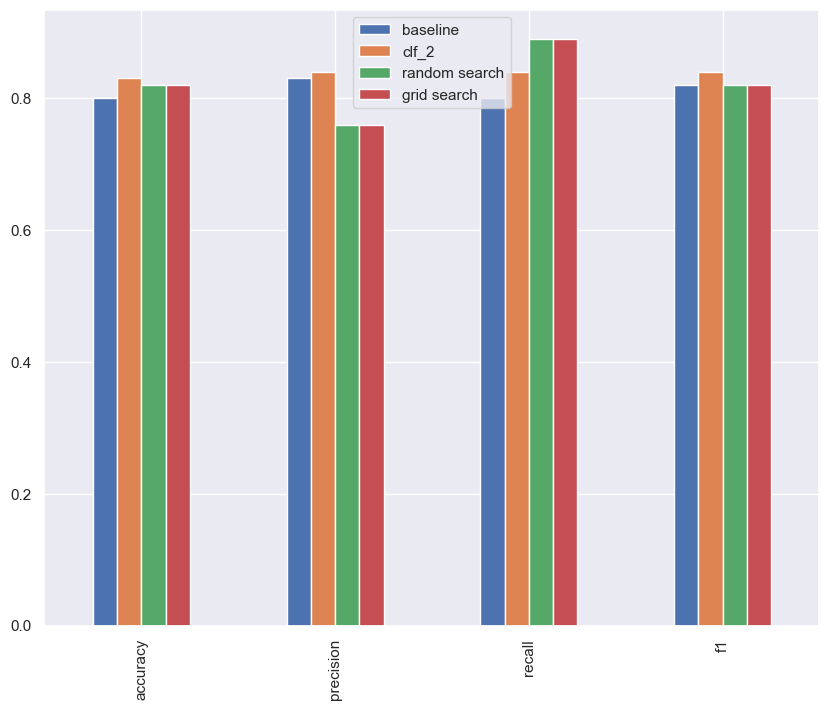

In [149]:
compare_metrics = pd.DataFrame({"baseline":baseline_matrics,
                               "clf_2":clf2_matrics,
                               "random search":rs_metrics,
                               "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with RandomizedSearchCV and GridSearchCV, this would require more experimentation.

Other techniques you could:

* Collecting more data - Based on the results our models are getting now, it seems like they're very capable of finding patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.

* Try a more advanced model - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as XGBoost or CatBoost might perform better. I'll leave these for extra-curriculum.

  
Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project.

Now we've got a tuned Random Forest model, let's find out how we might save it and export it so we can share it with others or potentially use it in an external application.

## 6.Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

### 6.1 Saving and loading a model with pickle

We'll use pickle's dump() method and pass it our model, gs_clf, along with the open() function containing a string for the filename we want to save our model as, along with the "wb" string which stands for "write binary", which is the file type open() will write our model as.

In [150]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open("gs_random_forest_model.pkl","wb"))

Once it's saved, we can import it using pickle's load() function, passing it open() containing the filename as a string and "rb" standing for "read binary".

In [151]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model.pkl","rb"))

In [152]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
loaded_pickle_model_metrics = evaluate_preds(y_test, pickle_y_preds)
loaded_pickle_model_metrics

Acc:81.97%
Precision:0.76
Recall:0.89
F1:0.82


{'accuracy': 0.82, 'precision': 0.76, 'recall': 0.89, 'f1': 0.82}

In [153]:
loaded_pickle_model_metrics == gs_metrics

True

### 6.2 Saving and loading a model with `joblib`

The other way to load and save models is with `joblib`. Which works relatively the same as pickle.

To save a model, we can use `joblib`'s dump() function, passing it the model (gs_clf) and the desired filename.

In [154]:
from joblib import dump,load
# Save an existing model to file
dump(gs_clf,filename="gs_random_forest_model_joblib.joblib")

['gs_random_forest_model_joblib.joblib']

Once you've saved a model using dump(), you can import it using load() and passing it the filename of the model.

In [155]:
# Load a saved model
loaded_model_1 = load(filename="gs_random_forest_model_joblib.joblib")

In [158]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_model_1.predict(X_test)
loaded_joblib_model_metrics = evaluate_preds(y_test, joblib_y_preds)
loaded_joblib_model_metrics

Acc:81.97%
Precision:0.76
Recall:0.89
F1:0.82


{'accuracy': 0.82, 'precision': 0.76, 'recall': 0.89, 'f1': 0.82}

In [159]:
loaded_joblib_model_metrics == gs_metrics

True

So which one should you use, pickle or joblib?

According to Scikit-Learn's model persistence documentation, they suggest it may be more efficient to use joblib as it's more efficient with large numpy arrays (which is what may be contained in trained/fitted Scikit-Learn models).

## 7. Revisiting the entire pipeline

A whole bunch of experimenting and code all over the place at the start and then once you've found something which works, the refinement process begins.

What would this refinement process look like?

Use the car sales regression problem (predicting the sale price of cars) as an example.

To tidy things up, will be using Scikit-Learn's sklearn.pipeline.Pipeline class.

You can imagine Pipeline as being a way to string a number of different Scikit-Learn processes together.

In [162]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [163]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [164]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

There's 1000 rows, three features are categorical (Make, Colour, Doors), the other two are numerical (Odometer (KM), Price) and there's 249 missing values.

We're going to have to turn the categorical features into numbers and fill the missing values before we can fit a model.

We'll build a Pipeline to do so.

Pipeline's main input parameter is steps which is a list of tuples ([(step_name, action_to_take)]) of the step name, plus the action you'd like it to perform.

In this case,the steps are:
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [170]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop the rows where price is missing
data = pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and transformer pipelines
cateogrical_features = ["Make","Colour"]
cateogrical_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing value")),
                                         ("onehotencoder",OneHotEncoder(handle_unknown="ignore"))])
door_feature = ["Doors"]
door_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value=4))])

odometer_feature = ["Odometer (KM)"]
odometer_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

# Setup preprocessing steps(fill missing data then convert it to numbers)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat",cateogrical_transformer,cateogrical_features),
        ("door",door_transformer,door_feature),
        ("odometer",odometer_transformer,odometer_feature)
    ]
)

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestRegressor())
])

# Split data 

X = data.drop("Price",axis=1)
y = data["Price"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model

model.fit(X_train,y_train)
model.score(X_test,y_test)

0.22188417408787875

What we've done is combine a series of data preprocessing steps (filling missing values, encoding numerical values) as well as a model into a Pipeline.

Doing so not only cleans up the code, it ensures the same steps are taken every time the code is run rather than having multiple different processing steps happening in different stages.

It's also possible to GridSearchCV or RandomizedSearchCV with a Pipeline.

The main difference is when creating a hyperparameter grid, you have to add a prefix to each hyperparameter 

The prefix is the name of the Pipeline step you'd like to alter, followed by two underscores.

For example, to adjust n_estimators of "model" in the Pipeline, you'd use: "model__n_estimators" (note the double underscore after model__ at the start).

In [172]:
pipe_grid = {
    "preprocessor__odometer__imputer__strategy" : ["mean","median"],
    "model__n_estimators" : [100,1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
    
}
gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__odometer__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_featur

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing '
                                                                                                                   'value',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('odometer',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__odometer__imputer__strategy': ['mean',
                                                                       'median']},
             verbose=2)

In [173]:
# Score the best model
gs_model.score(X_test, y_test)

0.2848784564026805